In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [64]:
df_train = pd.read_csv('train.csv', index_col='id')

In [65]:
df_train.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
df_train.shape

(159256, 23)

In [6]:
df_train.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [7]:
for col in df_train.columns:
    print(df_train[col].value_counts())

40    46691
60    19043
45    18480
50    15768
55    13446
35    13081
30    11465
25     9140
20     3829
65     3637
70     2229
75     1760
80      644
85       38
58        2
62        1
69        1
49        1
Name: age, dtype: int64
170    37398
165    30145
175    24852
160    22783
155    19597
150    11534
180     8185
145     2736
185     1562
140      410
190       44
135        8
181        1
139        1
Name: height(cm), dtype: int64
70     24168
65     23069
60     21658
75     19698
55     18715
50     13780
80     13631
85      8612
45      5420
90      4676
95      2647
100     1391
40       881
105      500
110      228
115       82
35        47
120       24
30        14
125        6
130        2
101        1
89         1
82         1
83         1
99         1
79         1
88         1
Name: weight(kg), dtype: int64
80.0     6572
86.0     6026
84.0     5986
82.0     5962
81.0     5619
         ... 
107.7       1
106.2       1
57.5        1
63.6        1
56.3        

In [8]:
df_train.smoking.unique()

array([1, 0], dtype=int64)

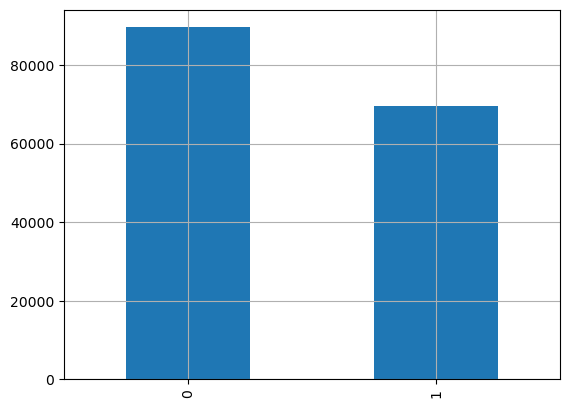

In [9]:
df_train.smoking.value_counts().plot.bar()
plt.grid()

In [66]:
df_train['bmi'] = round(df_train['weight(kg)']/((df_train['height(cm)']/100)**2), 2)

In [67]:
df_test = pd.read_csv('test.csv', index_col='id')

In [68]:
df_test['bmi'] = round(df_test['weight(kg)']/((df_test['height(cm)']/100)**2), 2)

In [13]:
model = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0)

In [14]:
X = df_train.drop(['weight(kg)', 'height(cm)', 'smoking'], axis = 1)
y = df_train['smoking']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print(f'размер трейновой выборки: {X_train.shape, y_train.shape} \nразмер тестовой выборки: {X_test.shape, y_test.shape}')

размер трейновой выборки: ((127404, 21), (127404,)) 
размер тестовой выборки: ((31852, 21), (31852,))


In [17]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(pred, y_test)

0.7449139771442923

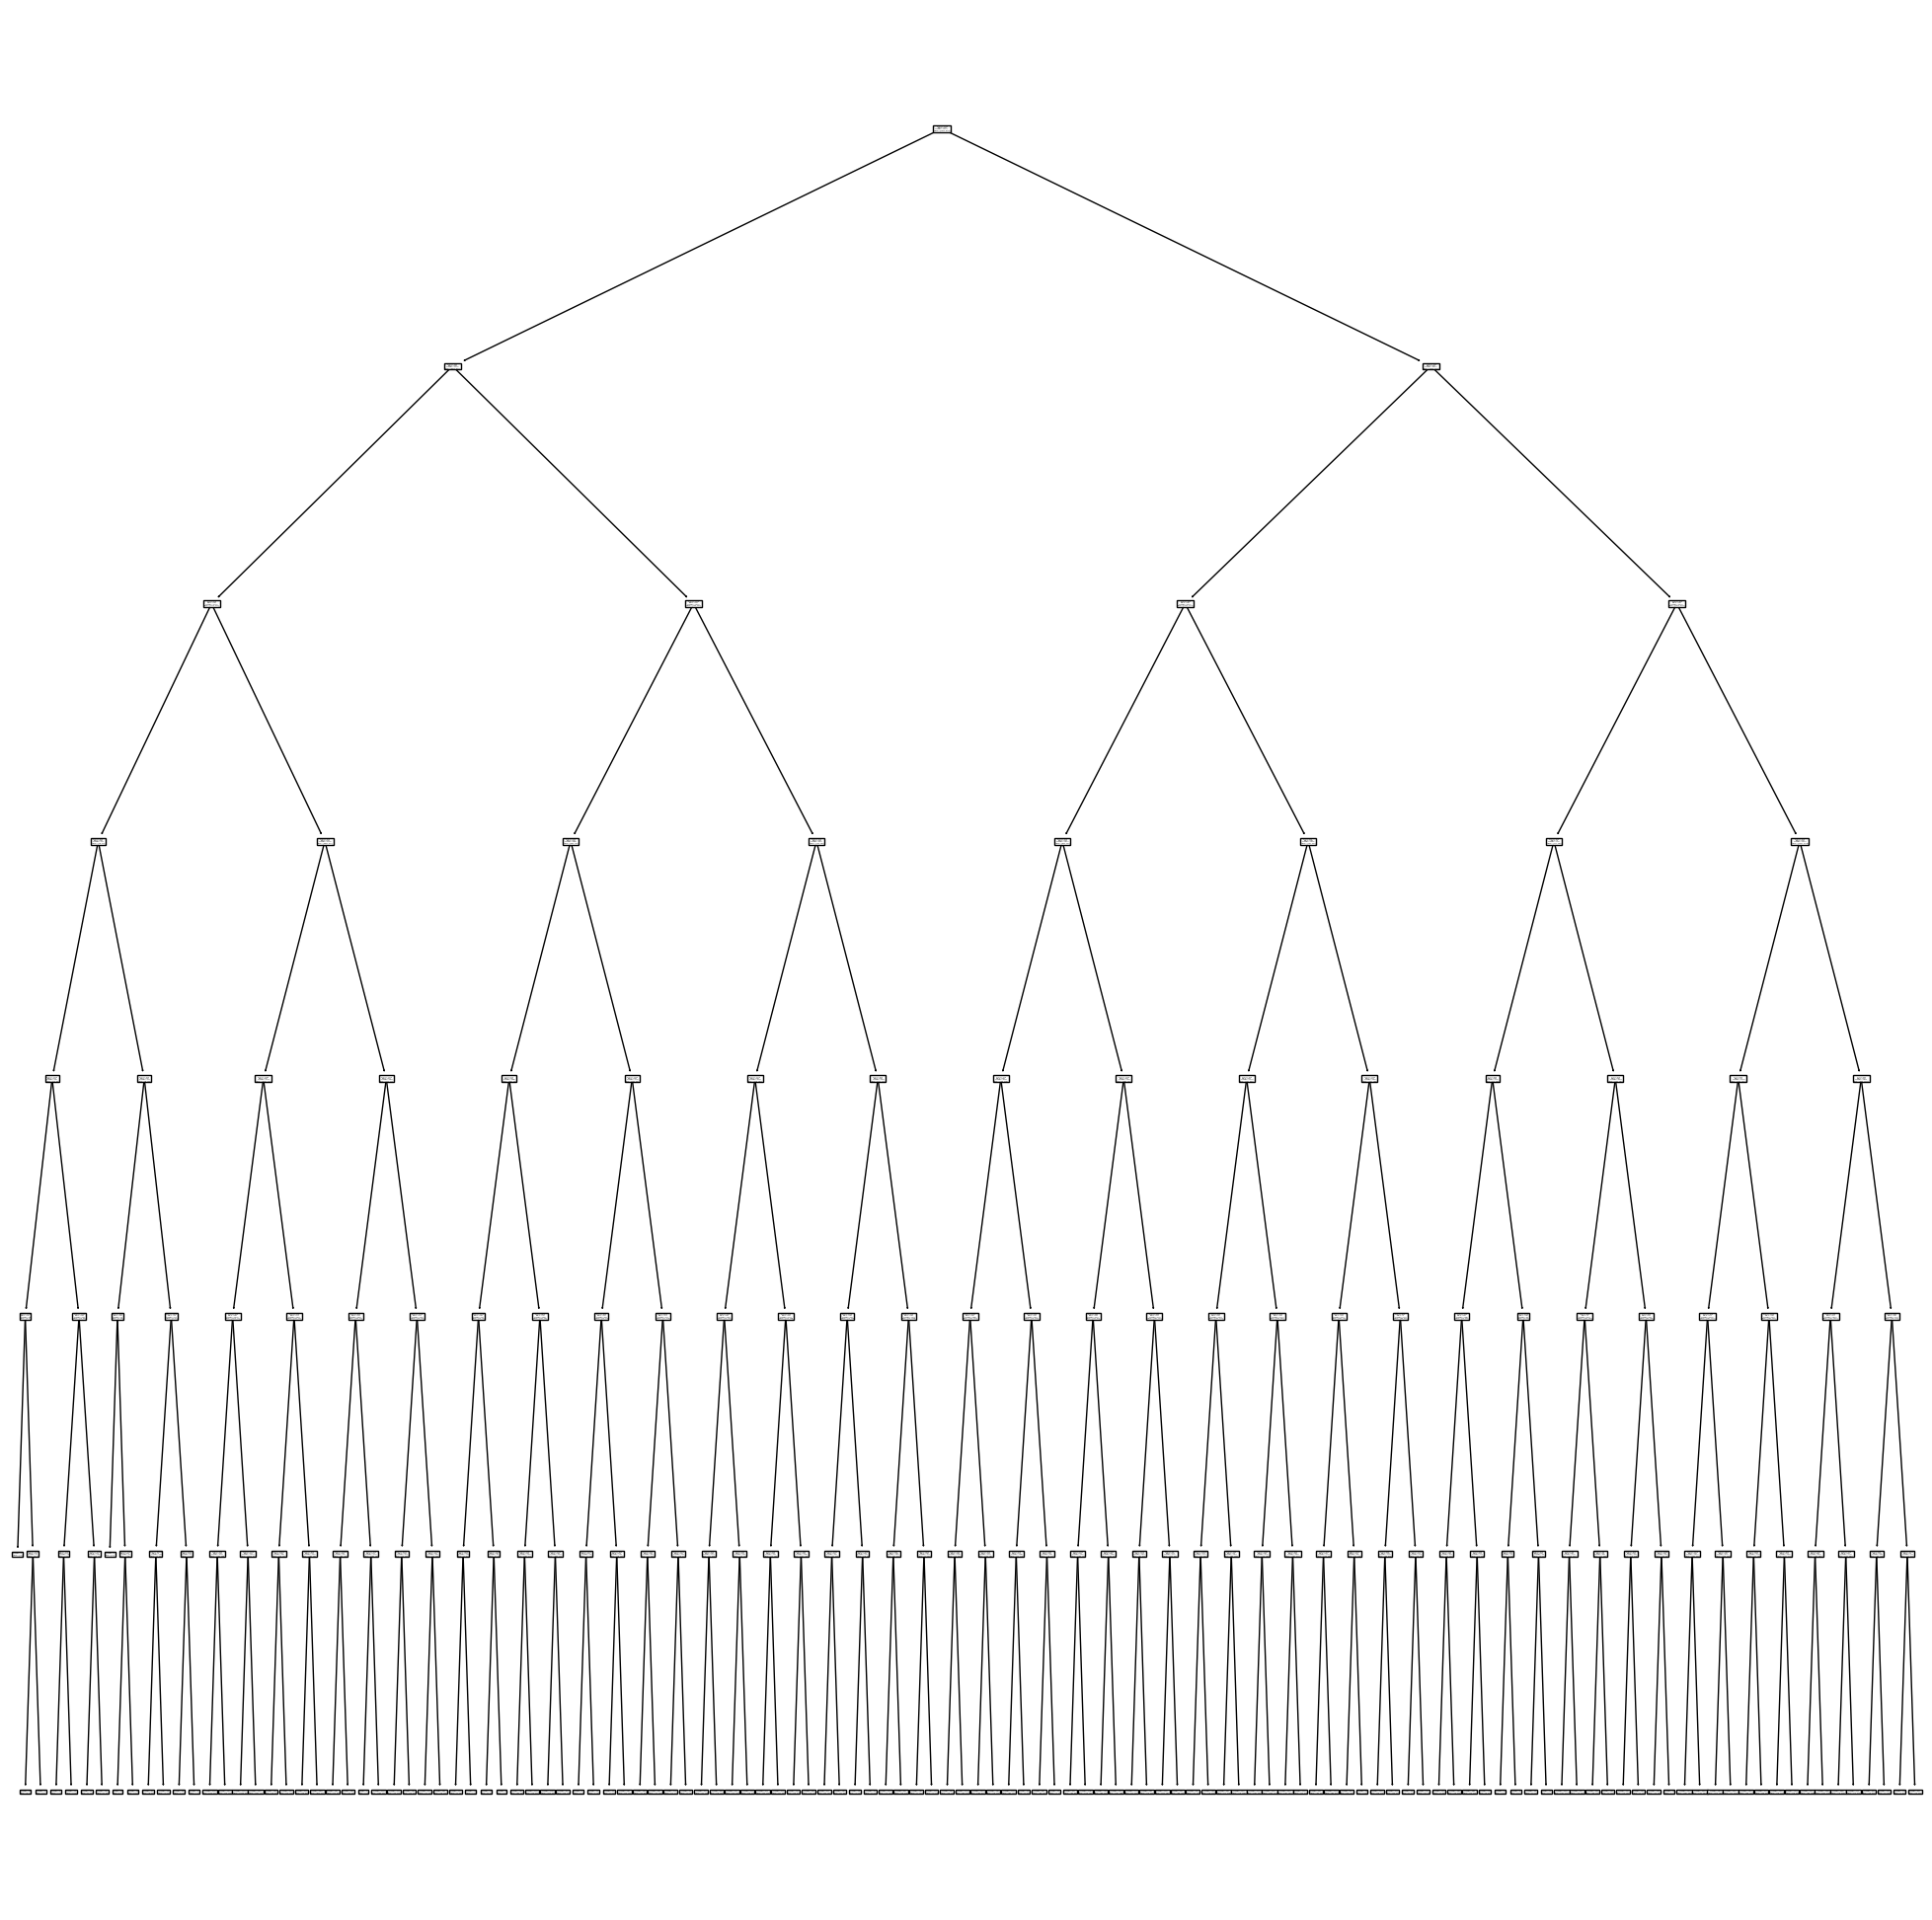

In [20]:
plt.figure(figsize = (25,25))
tree.plot_tree(model.fit(X_train, y_train))
plt.show()

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76     16012
           1       0.77      0.69      0.73     15840

    accuracy                           0.74     31852
   macro avg       0.75      0.74      0.74     31852
weighted avg       0.75      0.74      0.74     31852



In [26]:
print(confusion_matrix(pred, y_test))

[[12835  3177]
 [ 4948 10892]]


<Axes: >

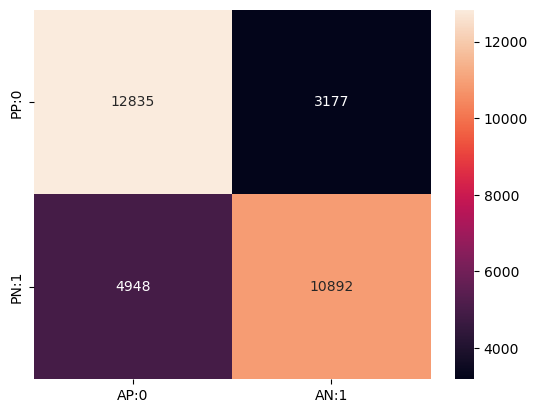

In [38]:
sns.heatmap(data = pd.DataFrame(confusion_matrix(pred, y_test), columns=['AP:0', 'AN:1'], index = ['PP:0', 'PN:1']),
            annot = True, fmt='d')

#### Качество модели ужасное

In [45]:
df_train[df_train['smoking'] == 1].describe().drop('count').style.background_gradient('autumn_r')

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
mean,41.539288,169.739150,72.164961,85.671199,1.051597,1.049836,1.017343,1.017099,123.350294,77.991171,100.030997,194.124704,152.537952,51.557607,112.299040,15.528544,1.062969,0.948292,26.154451,29.832714,47.030523,0.246192,1.000000,24.993911
std,10.799636,6.151247,11.262302,8.040383,0.374278,0.360582,0.130547,0.129641,11.787073,8.545482,16.623175,27.311349,68.183181,11.966778,26.406187,0.989043,0.321822,0.146291,9.911238,20.910066,36.568546,0.430795,0.000000,3.308611
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,80.000000,46.000000,48.000000,77.000000,16.000000,18.000000,1.000000,8.300000,1.000000,0.100000,9.000000,1.000000,2.000000,0.000000,1.000000,12.490000
25%,35.000000,165.000000,65.000000,80.000000,0.900000,0.900000,1.000000,1.000000,116.000000,71.000000,91.000000,175.000000,101.000000,43.000000,94.000000,14.900000,1.000000,0.900000,20.000000,19.000000,26.000000,0.000000,1.000000,22.490000
50%,40.000000,170.000000,70.000000,85.900000,1.000000,1.000000,1.000000,1.000000,122.000000,79.000000,97.000000,195.000000,145.000000,49.000000,112.000000,15.600000,1.000000,0.900000,24.000000,26.000000,37.000000,0.000000,1.000000,24.490000
75%,50.000000,175.000000,80.000000,91.000000,1.200000,1.200000,1.000000,1.000000,130.000000,83.000000,105.000000,214.000000,192.000000,58.000000,130.000000,16.200000,1.000000,1.000000,30.000000,36.000000,57.000000,0.000000,1.000000,27.550000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,203.000000,122.000000,375.000000,366.000000,766.000000,135.000000,1220.000000,21.000000,5.000000,3.000000,656.000000,2914.000000,999.000000,1.000000,1.000000,45.790000


In [47]:
df_train[df_train['smoking'] == 0].describe().drop('count').style.background_gradient('autumn_r')

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
mean,46.457819,161.790442,63.240349,80.927077,0.970196,0.963018,1.029128,1.028336,121.845507,76.005692,97.047811,197.095477,108.242972,59.191467,116.402308,14.228271,1.082988,0.849600,25.021216,23.998705,27.809326,0.160530,0.000000,24.031244
std,12.166010,9.010311,12.170514,9.084383,0.419043,0.411297,0.168168,0.165932,13.379236,9.236044,14.106175,29.147013,57.572478,14.483539,29.324307,1.463154,0.366582,0.190454,9.071951,14.331998,23.012251,0.367099,0.000000,3.355109
min,20.000000,135.000000,30.000000,56.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,46.000000,91.000000,8.000000,9.000000,15.000000,4.900000,1.000000,0.100000,6.000000,1.000000,3.000000,0.000000,0.000000,11.720000
25%,40.000000,155.000000,55.000000,74.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,176.000000,66.000000,48.000000,96.000000,13.200000,1.000000,0.700000,19.000000,15.000000,15.000000,0.000000,0.000000,21.480000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,95.000000,198.000000,93.000000,57.000000,116.000000,14.200000,1.000000,0.800000,23.000000,20.000000,21.000000,0.000000,0.000000,23.880000
75%,55.000000,170.000000,70.000000,87.000000,1.200000,1.200000,1.000000,1.000000,130.000000,81.000000,102.000000,220.000000,144.000000,69.000000,136.000000,15.300000,1.000000,1.000000,29.000000,29.000000,32.000000,0.000000,0.000000,25.950000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,365.000000,393.000000,466.000000,136.000000,1860.000000,20.400000,6.000000,9.900000,778.000000,745.000000,926.000000,1.000000,0.000000,44.440000


In [53]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
model = RandomForestClassifier(n_estimators=500, criterion= 'gini', max_depth=11)

In [69]:
print(confusion_matrix(y_test, pred))

[[13395  4388]
 [ 3021 11048]]


In [70]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     17783
           1       0.72      0.79      0.75     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.77      0.77     31852
weighted avg       0.77      0.77      0.77     31852



In [97]:
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred = model.predict(X_test)
accuracy_score(pred_train, y_train)
print(f'train: {accuracy_score(pred_train, y_train)},\ntest: {accuracy_score(pred, y_test)}')

train: 0.8029104266742018,
test: 0.7664510862740174


In [99]:
df_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,75,16.5,1,1.0,22,25,27,0,1,22.04
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,126,16.2,1,1.1,27,23,37,1,0,23.88
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,93,17.4,1,0.8,27,31,53,0,1,25.95
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,102,15.9,1,1.0,20,27,30,1,0,29.32
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,93,15.4,1,0.8,19,13,17,0,1,22.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,159,14.5,1,0.8,25,26,13,0,0,18.73
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,108,14.5,1,0.6,21,20,18,0,0,31.22
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,93,10.9,1,0.6,15,9,12,0,0,19.53


In [106]:
col = X.columns

In [112]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X = pd.DataFrame(X_scaler, columns=[col])

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [116]:
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred = model.predict(X_test)
accuracy_score(pred_train, y_train)
print(f'train: {accuracy_score(pred_train, y_train)},\ntest: {accuracy_score(pred, y_test)}')

train: 0.8019532086845391,
test: 0.7675917786428901


In [119]:
#df_test.drop(['weight(kg)', 'height(cm)'], axis = 1, inplace = True)

In [121]:
# df_test = scaler.transform(df_test)
# df_test = pd.DataFrame(df_test, columns=[col])

In [123]:
#pred_sample = model.predict(df_test)

In [137]:
#indexes = pd.read_csv('sample_submission.csv', index_col='id').index

In [147]:
#pred1 = pd.DataFrame(pred_sample, index=[indexes],columns=['smoking'])

In [151]:
#pred1.to_csv('pred1.csv', index = 'id')

In [152]:
#pd.read_csv('pred1.csv')

,id,smoking
0,159256,1
1,159257,0
2,159258,1
3,159259,0
4,159260,1
...,...,...
106166,265422,0
106167,265423,1
106168,265424,0
106169,265425,0


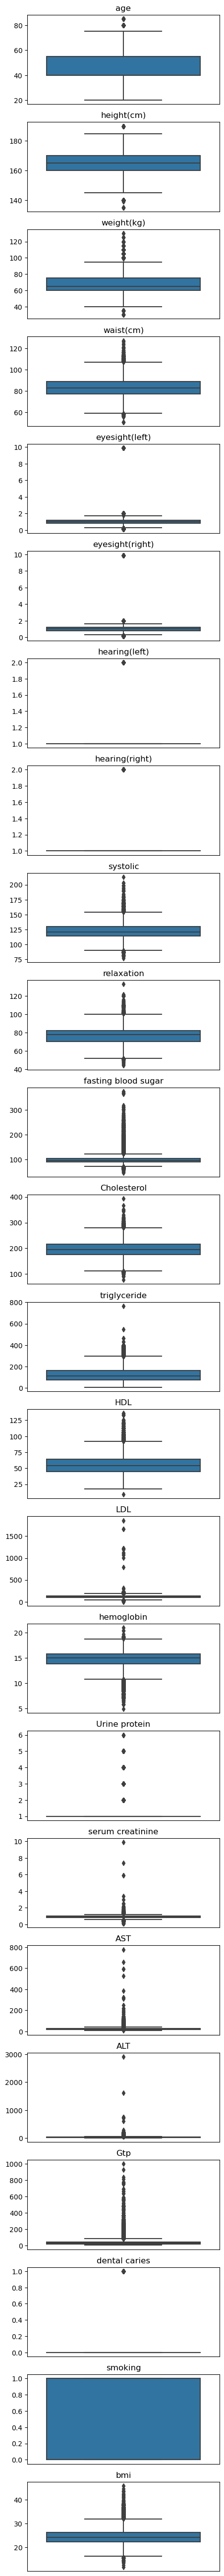

In [53]:
fig, ax = plt.subplots(24, 1, figsize = (5,67))
for i, col in enumerate(df_train.columns):
    sns.boxplot(df_train[col], ax = ax[i])
    ax[i].set_title(col)
    ax[i].get_xaxis().set_visible(False)

In [91]:
df_train['Gtp'].describe()

count    159233.000000
mean         36.217675
std          31.206381
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64

In [74]:
df_train[df_train['serum creatinine']>=2].index

Int64Index([ 12600,  19054,  28006,  31859,  38827,  43304,  45351,  54762,
             55250,  56285,  58396,  79196,  89833, 110269, 119181, 124497,
            124698, 130130, 132562, 135930, 136624, 154455, 156610],
           dtype='int64', name='id')

In [69]:
df_train.drop(df_train[df_train['serum creatinine']>=2].index, inplace = True)

In [70]:
df_train.drop(df_train[df_train['Gtp']>=200].index, inplace = True)

In [71]:
df_train.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
count,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,...,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000,158563.000000
mean,44.299591,165.258036,67.130674,82.987300,1.005966,1.000975,1.023978,1.023379,122.477160,76.855698,...,114.638295,14.794185,1.073655,0.892239,25.437479,26.437858,35.142385,0.197701,0.435984,24.450026
std,11.844946,8.826730,12.585557,8.957212,0.402500,0.391418,0.152981,0.151104,12.717635,8.989515,...,28.155893,1.430815,0.345949,0.175650,9.127592,17.401561,25.391188,0.398266,0.495887,3.367448
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000,11.720000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,...,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000,22.220000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,...,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000,24.220000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,43.000000,0.000000,1.000000,26.160000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,1860.000000,21.000000,6.000000,1.900000,778.000000,2914.000000,198.000000,1.000000,1.000000,45.790000


In [72]:
df_train.drop(df_train[df_train['LDL']>500].index, inplace = True)

In [73]:
df_train.drop(df_train[df_train['ALT']>=70].index, inplace = True)

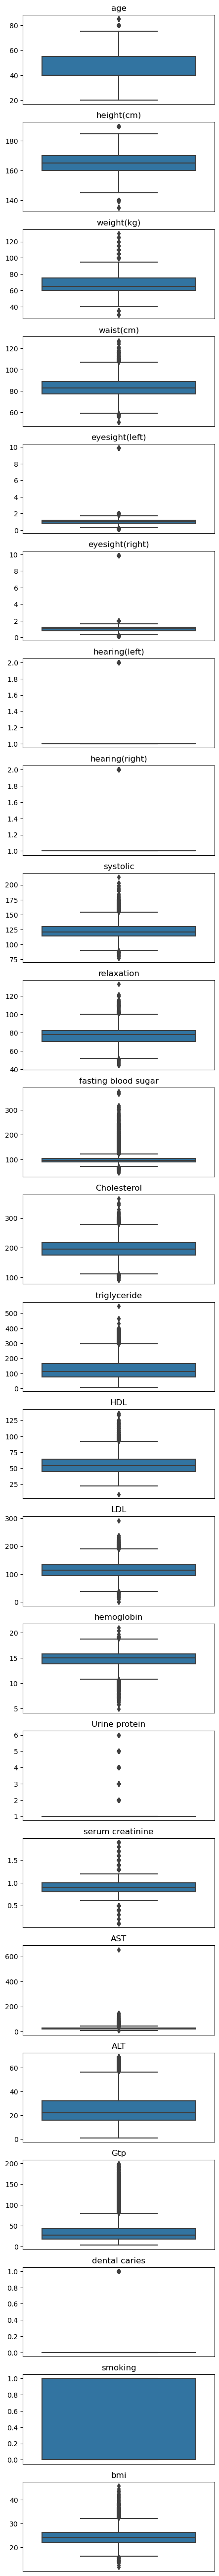

In [17]:
fig, ax = plt.subplots(24, 1, figsize = (5,67))
for i, col in enumerate(df_train.columns):
    sns.boxplot(df_train[col], ax = ax[i])
    ax[i].set_title(col)
    ax[i].get_xaxis().set_visible(False)

In [74]:
df_train.drop(df_train[df_train['systolic']>160].index, inplace = True)

In [75]:
df_train.drop(df_train[df_train['fasting blood sugar']>200].index, inplace = True)

In [28]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,155033.0,44.397877,11.844006,20.00,40.00,40.00,55.00,85.00
height(cm),155033.0,165.171544,8.832600,135.00,160.00,165.00,170.00,190.00
weight(kg),155033.0,66.857514,12.415564,30.00,60.00,65.00,75.00,130.00
waist(cm),155033.0,82.803663,8.872628,51.00,77.00,83.00,89.00,127.00
eyesight(left),155033.0,1.005127,0.404245,0.10,0.80,1.00,1.20,9.90
eyesight(right),155033.0,0.999955,0.392511,0.10,0.80,1.00,1.20,9.90
hearing(left),155033.0,1.024292,0.153953,1.00,1.00,1.00,1.00,2.00
hearing(right),155033.0,1.023724,0.152188,1.00,1.00,1.00,1.00,2.00
systolic,155033.0,122.298427,12.533500,77.00,114.00,121.00,130.00,160.00
relaxation,155033.0,76.740978,8.922471,44.00,70.00,78.00,82.00,120.00


In [18]:
df_train.nunique()

age                     18
height(cm)              14
weight(kg)              28
waist(cm)              526
eyesight(left)          20
eyesight(right)         17
hearing(left)            2
hearing(right)           2
systolic               112
relaxation              74
fasting blood sugar    229
Cholesterol            225
triglyceride           391
HDL                    107
LDL                    213
hemoglobin             134
Urine protein            6
serum creatinine        19
AST                    110
ALT                     69
Gtp                    195
dental caries            2
smoking                  2
bmi                    163
dtype: int64

In [19]:
X = df_train.drop(['height(cm)', 'weight(kg)', 'smoking'], axis = 1)
y = df_train['smoking']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=10)

In [21]:
from xgboost import XGBClassifier

In [53]:
model = XGBClassifier(n_estimators = 2048, max_depth = 7, eta = 0.03, reg_lambda = 0.5, subsample = 0.75)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
print(f'Train: {accuracy_score(pred_train, y_train)}\nTest: {accuracy_score(pred_test, y_test)}')

Train: 0.8958899764364691
Test: 0.7833697094192665


In [36]:
col = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=col)

In [15]:
df_train.nunique()

age                     18
height(cm)              14
weight(kg)              28
waist(cm)              531
eyesight(left)          20
eyesight(right)         17
hearing(left)            2
hearing(right)           2
systolic               112
relaxation              75
fasting blood sugar    229
Cholesterol            227
triglyceride           392
HDL                    108
LDL                    222
hemoglobin             134
Urine protein            6
serum creatinine        28
AST                    140
ALT                    188
Gtp                    362
dental caries            2
smoking                  2
bmi                    163
dtype: int64

In [76]:
df_train['wsr'] = round(df_train['weight(kg)']/df_train['height(cm)'], 2)

In [77]:
df_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi,wsr
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,16.5,1,1.0,22,25,27,0,1,22.04,0.36
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,16.2,1,1.1,27,23,37,1,0,23.88,0.39
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,17.4,1,0.8,27,31,53,0,1,25.95,0.44
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,15.9,1,1.0,20,27,30,1,0,29.32,0.53
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,15.4,1,0.8,19,13,17,0,1,22.04,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,14.5,1,0.8,25,26,13,0,0,18.73,0.29
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,14.5,1,0.6,21,20,18,0,0,31.22,0.48
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,10.9,1,0.6,15,9,12,0,0,19.53,0.31


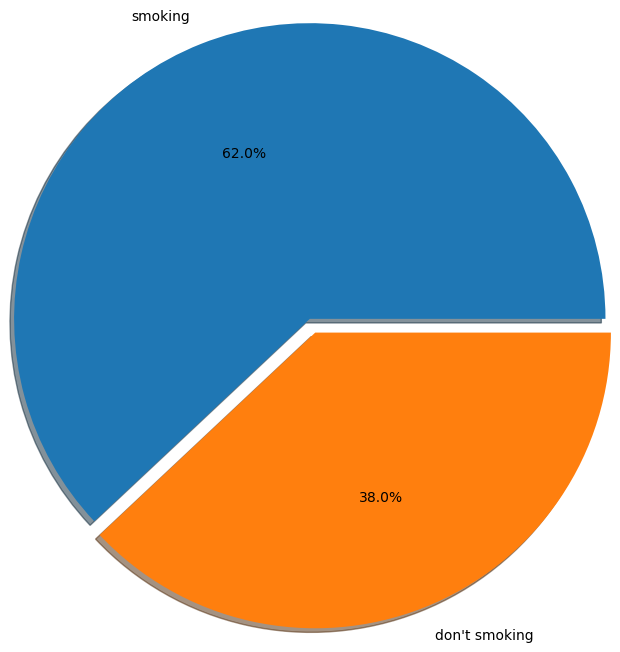

In [56]:
df_train[df_train['wsr']>0.5].smoking.value_counts().plot.pie(autopct = '%1.1f%%',
                                                              explode = [0, 0.1], shadow = True, radius = 2,
                                                             labels = ["smoking", "don't smoking"])
plt.ylabel(' ')
plt.show()

In [34]:
cat_col = ['hearing(left)', 'hearing(right)', 'Urine protein', 'dental caries', 'smoking']

In [35]:
val_col = []
for i in list(df_train.columns):
    if i not in cat_col:
        val_col.append(i)

In [37]:
df_train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking', 'bmi'],
      dtype='object')

In [107]:
df_train['wsr'] = round((df_train['waist(cm)']/df_train['height(cm)'])*100, 2)

In [79]:
df_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi,wsr
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,16.5,1,1.0,22,25,27,0,1,22.04,49.09
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,16.2,1,1.1,27,23,37,1,0,23.88,53.94
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,17.4,1,0.8,27,31,53,0,1,25.95,47.65
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,15.9,1,1.0,20,27,30,1,0,29.32,58.33
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,15.4,1,0.8,19,13,17,0,1,22.04,48.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,14.5,1,0.8,25,26,13,0,0,18.73,44.52
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,14.5,1,0.6,21,20,18,0,0,31.22,52.90
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,10.9,1,0.6,15,9,12,0,0,19.53,41.25


In [108]:
df_train.loc[(df_train['wsr']>35)&(df_train['wsr']<43), 'wsr_cat'] = 0
df_train.loc[(df_train['wsr']>=43)&(df_train['wsr']<46), 'wsr_cat'] = 1
df_train.loc[(df_train['wsr']>=46)&(df_train['wsr']<51), 'wsr_cat'] = 2
df_train.loc[(df_train['wsr']>=51)&(df_train['wsr']<56), 'wsr_cat'] = 3
df_train.loc[(df_train['wsr']>=56)&(df_train['wsr']<61), 'wsr_cat'] = 4
df_train.loc[(df_train['wsr']>=61), 'wsr_cat'] =5

In [109]:
df_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi,wsr,wsr_cat
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,1,1.0,22,25,27,0,1,22.04,49.09,2
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,1,1.1,27,23,37,1,0,23.88,53.94,3
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,1,0.8,27,31,53,0,1,25.95,47.65,2
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,1,1.0,20,27,30,1,0,29.32,58.33,4
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,1,0.8,19,13,17,0,1,22.04,48.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,1,0.8,25,26,13,0,0,18.73,44.52,1
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,1,0.6,21,20,18,0,0,31.22,52.90,3
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,1,0.6,15,9,12,0,0,19.53,41.25,0


In [113]:
df_train.loc[df_train['bmi']<16, 'bmi_cat'] = 0
df_train.loc[(df_train['bmi']>=16)&(df_train['bmi']<18.5), 'bmi_cat'] = 1
df_train.loc[(df_train['bmi']>=18.5)&(df_train['bmi']<25), 'bmi_cat'] = 2
df_train.loc[(df_train['bmi']>=25)&(df_train['bmi']<30), 'bmi_cat'] = 3
df_train.loc[(df_train['bmi']>=30)&(df_train['bmi']<35), 'bmi_cat'] = 4
df_train.loc[(df_train['bmi']>=35)&(df_train['bmi']<40), 'bmi_cat'] = 5
df_train.loc[df_train['bmi']>=40, 'bmi_cat'] = 6

In [116]:
df_train['bmi_cat'] = df_train['bmi_cat'].astype(int)

In [117]:
df_train

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi,wsr,wsr_cat,bmi_cat
id,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,...,1.0,22,25,27,0,1,22.04,49.09,2,2
1,70,165,65,89.0,0.6,0.7,2,2,146,83,...,1.1,27,23,37,1,0,23.88,53.94,3,2
2,20,170,75,81.0,0.4,0.5,1,1,118,75,...,0.8,27,31,53,0,1,25.95,47.65,2,3
3,35,180,95,105.0,1.5,1.2,1,1,131,88,...,1.0,20,27,30,1,0,29.32,58.33,4,3
4,30,165,60,80.5,1.5,1.0,1,1,121,76,...,0.8,19,13,17,0,1,22.04,48.79,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,...,0.8,25,26,13,0,0,18.73,44.52,1,2
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,...,0.6,21,20,18,0,0,31.22,52.90,3,4
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,...,0.6,15,9,12,0,0,19.53,41.25,0,2


In [118]:
df_test

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,bmi
id,,,,,,,,,,,,,,,,,,,,,
159256,40,165,70,84.0,1.2,1.2,1,1,130,89,...,49,115,14.2,1,0.9,19,25,32,0,25.71
159257,80,160,60,93.0,1.0,1.0,2,2,144,72,...,35,104,13.0,1,1.1,20,12,24,0,23.44
159258,60,170,70,86.5,0.6,0.7,1,1,117,75,...,39,88,15.4,1,1.4,38,60,36,0,24.22
159259,40,160,50,67.0,0.3,0.4,1,1,116,62,...,75,128,14.5,1,0.6,25,18,10,1,19.53
159260,40,170,75,89.4,1.0,0.9,1,1,132,94,...,39,123,16.5,1,1.0,30,39,27,1,25.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265422,40,165,60,78.0,0.8,0.9,1,1,112,78,...,59,149,16.4,1,1.1,24,31,28,0,22.04
265423,40,170,85,95.0,1.2,1.2,1,1,130,90,...,44,100,16.0,2,1.0,25,31,38,0,29.41
265424,35,170,85,89.0,1.2,1.2,1,1,131,86,...,53,142,15.9,1,0.8,33,32,24,1,29.41


In [ ]:
def df_canvers(df):
    df['wsr'] = round((df['waist(cm)']/df['height(cm)'])*100, 2)
    df.loc[(df['wsr']>35)&(df['wsr']<43), 'wsr_cat'] = 0
    df.loc[(df['wsr']>=43)&(df['wsr']<46), 'wsr_cat'] = 1
    df.loc[(df_train['wsr']>=46)&(df['wsr']<51), 'wsr_cat'] = 2
    df.loc[(df_train['wsr']>=51)&(df['wsr']<56), 'wsr_cat'] = 3
    df.loc[(df_train['wsr']>=56)&(df['wsr']<61), 'wsr_cat'] = 4
    df.loc[(df_train['wsr']>=61), 'wsr_cat'] =5
    
    df.loc[df['bmi']<16, 'bmi_cat'] = 0
    df.loc[(df['bmi']>=16)&(df['bmi']<18.5), 'bmi_cat'] = 1
    df.loc[(df['bmi']>=18.5)&(df['bmi']<25), 'bmi_cat'] = 2
    df.loc[(df['bmi']>=25)&(df['bmi']<30), 'bmi_cat'] = 3
    df.loc[(df['bmi']>=30)&(df['bmi']<35), 'bmi_cat'] = 4
    df.loc[(df['bmi']>=35)&(df['bmi']<40), 'bmi_cat'] = 5
    df.loc[df['bmi']>=40, 'bmi_cat'] = 6
    df['bmi_cat'] = df['bmi_cat'].astype(int)
    
    